<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%EA%B3%A0%EC%A0%84%EC%97%AD%ED%95%99_001_%EC%8B%9C%EB%AE%AC%EB%A0%88%EC%9D%B4%EC%85%98_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 고전역학



* 컴퓨터는 문제 해결 과정의 "작업"을 편리하게 해줄 뿐, 문제 해결 방법을 대신 생각해주지 못한다.
* 인공지능은 이미 알려진 해결 방법 일부를 제시해 주거나 코딩 작업의 상당 부분을 대신해 줄 수는 있지만 새로운 해결책을 제시해 주지 못한다. --- 심지어, 이미 알려진 해결책도 사용자가 지적하기 전에는 제시하지 못할 때도 있다. (디버깅도 포함)
* 문제 해결의 주도권은 사람이 가질 것.



> 회화에서 배울 수 있는 또 다른 예는 그림이 점진적인 수정을 통해 만들어지는 방식입니다. 그림은 보통 스케치로 시작합니다. 점차적으로 세부 사항을 채워나갑니다. 하지만 단순히 채우는 과정이 아닙니다. 때로는 원래 계획이 틀렸음이 밝혀지기도 합니다. 엑스레이로 보면 수많은 그림에서 팔다리가 움직이거나 얼굴 특징이 수정된 것을 볼 수 있습니다.
> 바로 이런 경우를 회화에서 배울 수 있습니다. 해킹도 이런 식으로 이루어져야 한다고 생각합니다. 프로그램의 사양이 완벽할 것이라고 기대하는 것은 비현실적입니다. 이 점을 미리 인정하고 사양을 상황에 따라 변경할 수 있도록 프로그램을 작성하는 것이 더 좋습니다.
-- Paul Graham, "Hackers and Painters" --

참고 교재:

Fowles, Analytical Mechanics, 7th edition

번역서: (재개정판) 해석역학, 제7판

## 수치 모의 실험(simulation) 기초(1/3)


## 등속 직선 운동 (Euler 방법)

물체가 일정한 속도로 운동할 때,
$$속도=\dfrac{나중\ 위치 - 처음\ 위치}{시간}.$$


이므로 처음 위치와 속도를 알 때 나중 위치는
$$나중\ 위치 = 처음\ 위치+ 속도\times 시간$$ 과 같이 구할 수 있다.

즉, 시간을 일정한 간격 ($\Delta t$)으로 번호를 붙여 나눠서, $n$번째 시각을 $t_n$, $n+1$번째 시각을 $t_{n+1}$, 등으로 쓴 다음,

시각 $ t_n $, $t_{n+1}(t_{n+1}= t_n + \Delta t) $일 때의 위치를 각각 $x_{n}$, $x_{n+1}$이라 하고, 속도를 $v$라 하면,
$$v = \dfrac{x_{n+1}-x_{n}}{\Delta t}\space\space(상수)$$

$$ \Rightarrow \space x_{n+1} = x_n + v\cdot\Delta t$$
)

In [ ]:
# 상수 값 정의
v = 10.0 # [m/s]
t0 = 0.0 # [s]
x0 = 0.0 # [m]
Delta_t = 0.1 # [s]

#변수 값 초기화
t = t0
x = x0
t_euler = [t] # List (시간)
x_euler = [x] # List (위치)

# x값의 변화를 한 단계씩 계산하며 저장한다
for n in range(1, 21):
  t = t + Delta_t
  x = x + v * Delta_t

  t_euler.append(t)
  x_euler.append(x)

In [ ]:
len(x_euler), x_euler[0], x_euler[-1]

(21, 0.0, 20.0)

In [ ]:
t_euler

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 0.9999999999999999,
 1.0999999999999999,
 1.2,
 1.3,
 1.4000000000000001,
 1.5000000000000002,
 1.6000000000000003,
 1.7000000000000004,
 1.8000000000000005,
 1.9000000000000006,
 2.0000000000000004]

In [ ]:
# 그래프 작성을 위한 패키지
import matplotlib.pyplot as plt

Text(0, 0.5, 'position [m]')

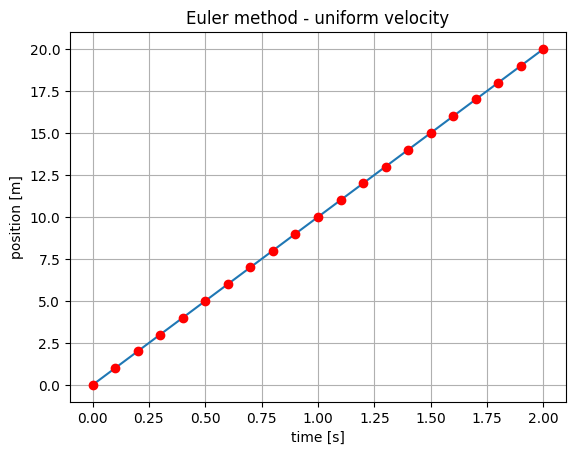

In [ ]:
# 계산하여 저장한 t, x 값을 그래프로 그려본다
plt.title("Euler method - uniform velocity")
plt.grid()
plt.plot(t_euler, x_euler)
plt.scatter(t_euler, x_euler, c='r', zorder=2)
plt.xlabel("time [s]")
plt.ylabel("position [m]")

## 등가속도 직선 운동
- 속도가 일정한 비율로 변하는 운동

### 오일러 방법
- 시시각각 변하는 속도를 매 단계에 반영하여 다음 위치를 구할 때 이용한다.

$가속도 = \dfrac{나중\ 속도 -  처음\ 속도}{시간},$

$현재\ 속도 = \dfrac{나중\ 위치 -  처음\ 위치}{시간}.$

즉,

$a = \dfrac{v_{n+1} - v_{n}}{\Delta t}\space\space(상수),$

$\color{red}{v_n} = \dfrac{x_{n+1}-x_{n}}{\Delta t}\space\space(상수 아님)$

임을 이용하여

$\left\{
\begin{align}
x_{n+1} &= x_n + {\color{red} {v_n}}\cdot\Delta t \\
\\
v_{n+1} &= v_n + a\cdot\Delta t \\
\end{align}
\right.$

와 같이 다음 위치와 속도를 함께 갱신해가며 구한다.
(Euler method)

In [ ]:
# 상수 정의
v0 = 0.0
a = 1.0
t0 = 0.0
x0 = 0.0
Delta_t = 0.1

# 변수 값 초기화
t = t0
x = x0
v = v0
t_euler = [t]
x_euler = [x]
v_euler = [v]

# 변화하는 위치와 속도 값을 계산하여 저장
for n in range(1, 21):
  t = t + Delta_t
  x = x + v * Delta_t  # 다음 단계 위치
  v = v + a * Delta_t  # 다음 단계 속도

  t_euler.append(t)
  x_euler.append(x)
  v_euler.append(v)

Text(0, 0.5, 'x [m]')

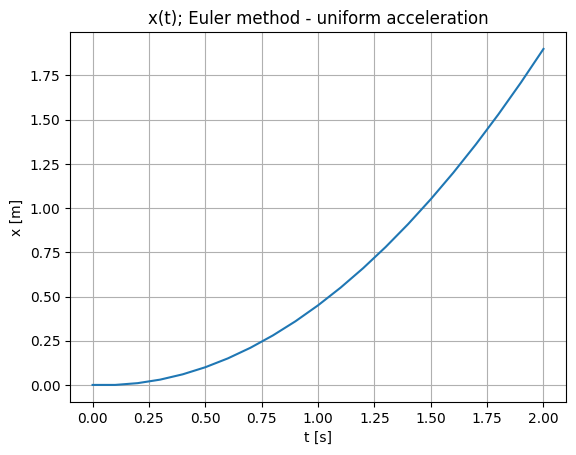

In [ ]:
# x-t 그래프
plt.title("x(t); Euler method - uniform acceleration")
plt.grid()
plt.plot(t_euler, x_euler)
plt.xlabel("t [s]")
plt.ylabel("x [m]")

Text(0, 0.5, 'v [m/s]')

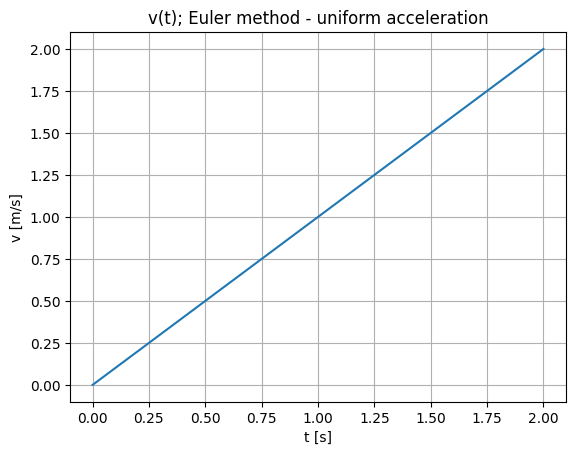

In [ ]:
# v-t 그래프
plt.title("v(t); Euler method - uniform acceleration")
plt.grid()
plt.plot(t_euler, v_euler)
plt.xlabel("t [s]")
plt.ylabel("v [m/s]")

* Exact solution과 비교(해석적 풀이)

$v = v_0 + a \cdot t$

$ x = x_0 + v_0 \cdot t + \dfrac{1}{2} a \cdot t^2$

In [ ]:
# 배열(array) 계산을 위한 패키지
# Numpy-examples 노트복 참조
import numpy as np

In [ ]:
tref = np.linspace(0, 2, 21)
vref = v0 + a * tref
xref = x0 + v0 * tref + (1/2) * a * tref**2

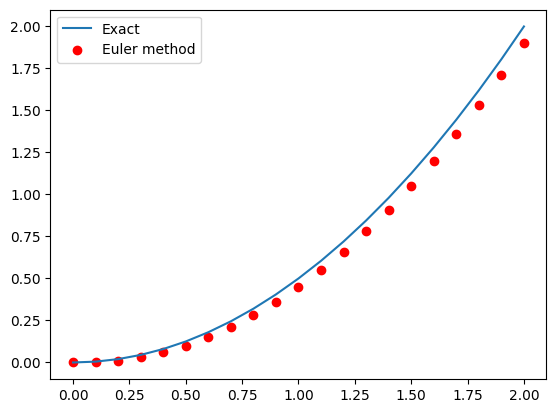

In [ ]:
plt.plot(tref, xref, label="Exact")
plt.scatter(t_euler, x_euler, c='r', label="Euler method")
plt.legend()

In [ ]:
x_euler[-1], xref[-1]

(1.9000000000000004, np.float64(2.0))

### 오일러-크로머 방법

$\left\{
\begin{align}
{\color{red} {v_{n+1}}} &= v_n + a\cdot\Delta t, \\
\\
x_{n+1} &= x_n + {\color{red} {v_{n+1}}}\cdot\Delta t. \\
\end{align}
\right.$

(Euler-Cromer method)

In [ ]:
v0 = 0.0
a = 1.0
t0 = 0.0
x0 = 0.0
Delta_t = 0.1

t = t0
x = x0
v = v0
t_ec = [t]
x_ec = [x]
v_ec = [v]
for n in range(1, 21):
  t = t + Delta_t
  v = v + a * Delta_t  # update v first
  x = x + v * Delta_t  # then update x with updated v

  t_ec.append(t)
  x_ec.append(x)
  v_ec.append(v)

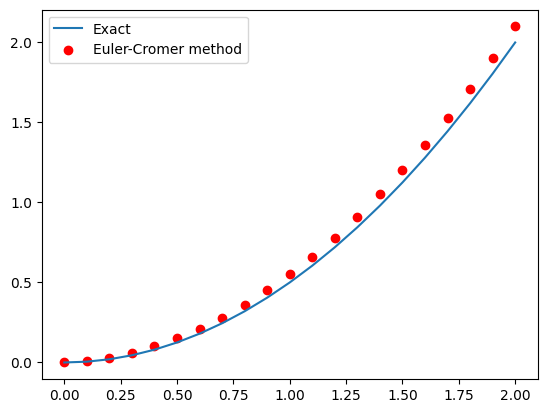

In [ ]:
plt.plot(tref, xref, label="Exact")
plt.scatter(t_ec, x_ec, c='r', label="Euler-Cromer method")
plt.legend()

### 등가속도 직선 운동(중간점 방법 mid-point method)

> 인용구 추가



등가속도 운동에서
$\Delta x = v_{평균}\cdot\Delta t$

$v_{n+1} = v_{n}+a\cdot\Delta t$이므로

$\begin{align}v_{n+\frac{1}{2}}
&=v_n + a\cdot\dfrac{\Delta t}{2}\\
&={\mathrm 중간점\ 속도} (v_{\mathrm {mid}}).
\end{align}
$

$\left\{
\begin{align}
{\color{red} {v_{\rm mp}}} &= v_n + a\cdot\dfrac{\Delta t}{2} \\
x_{n+1} &= x_n + {\color{red} {v_{\rm mp}}}\cdot\Delta t
\\
v_{n+1} &= v_n + a\cdot\Delta t \\
\end{align}
\right.$

(mid-point method)

$\ast$ 중간점 방법은 __등가속도 운동에 한해__ 정확한 결과를 준다.


In [ ]:
v0 = 0.0
a = 1.0
t0 = 0.0
x0 = 0.0
Delta_t = 0.1

t = t0
x = x0
v = v0
t_mp = [t]
x_mp = [x]
v_mp = [v]
for n in range(1, 21):
  t = t + Delta_t
  vmp = v + a * Delta_t/2  # v_mid
  x = x + vmp * Delta_t  # update x with v_mid
  v = v + a * Delta_t

  t_mp.append(t)
  x_mp.append(x)
  v_mp.append(v)

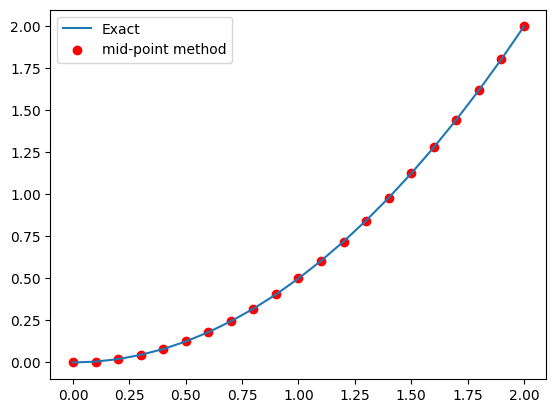

In [ ]:
plt.plot(tref, xref, label="Exact")
plt.scatter(t_mp, x_mp, c='r', label="mid-point method")
plt.legend()

In [ ]:
x_mp[-1], xref[-1]

(2.0, np.float64(2.0))

### 등가속도 직선 운동 : 평균값 방법 또는 호인의 방법(Heun's method)

등가속도 운동에서
$\Delta x = v_{평균}\cdot\Delta t$

$v_{n+1} = v_{n}+a\cdot\Delta t$이므로

$ v_{평균} = \dfrac{1}{2}\left(v_n + v_{n+1}\right) $
을 그대로 이용하여 $t_n$일 때의 속도와 $t_{n+1}$일 때의 속도를 구한 다음, 두 속도의 평균을 이용하여 $x$를 갱신하는 방법이다.

$\left\{
\begin{align}
v_{n+1} &= v_n + a\cdot\Delta t \\
{\color{red} {v_{\rm avg.}}} &= \frac{1}{2}\left(v_n + v_{n+1}\right) \\
x_{n+1} &= x_n + {\color{red} {v_{\rm avg.}}}\cdot\Delta t
\\
\end{align}
\right.$

(Heun's method)

$\ast$ 호인의 방법은  __등가속도 운동에 한해__ 중간점 방법과 동일한 결과를 준다.


In [ ]:
v0 = 0.0
a = 1.0
t0 = 0.0
x0 = 0.0
Delta_t = 0.1

t = t0
x = x0
v = v0
t_heun = [t]
x_heun = [x]
v_heun = [v]
for n in range(1, 21):
  t = t + Delta_t
  vnext = v + a * Delta_t  # v_mid
  vavg = (v + vnext) / 2
  x = x + vavg * Delta_t  # update x with v_mid
  v = vnext

  t_heun.append(t)
  x_heun.append(x)
  v_heun.append(v)

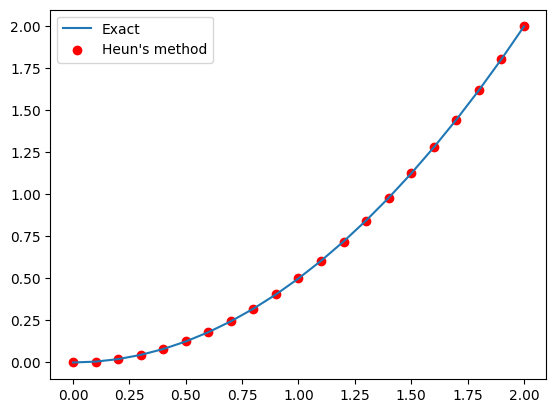

In [ ]:
plt.plot(tref, xref, label="Exact")
plt.scatter(t_heun, x_heun, c='r', label="Heun's method")
plt.legend()

In [ ]:
x_heun[-1], xref[-1]

(2.0, np.float64(2.0))